lesson 17.11.23
hw: create API key for ChatGPT!

dataset exploration: 

    

In [36]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/a2/1a/37c7ee1bc806d6c32621fecc72c19f6a9f9b4369e5e8f406a7c16d49f031/folium-0.15.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/2f/e7/603b136221de923055716d23e3047da71f92e0d8ba2c4517ce49a54fe768/branca-0.7.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.0 MB/s eta 0:00:00 0:00:01


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsd
import numpy as np
import geopandas as gpd
import os
import folium

In [6]:
!pip install geopandas

In [16]:
nyc_taxis = pd.read_csv('../../Data/csv/nyc_taxis.csv')

copy table - ask prof how

In [17]:
os.listdir()

['13_Scraping.ipynb',
 '02_EDA_Pandas_2.ipynb',
 'data_exploration.ipynb',
 '12_NLP_Transformers.ipynb',
 '09_NLP_TopicModeling_Clustering.ipynb',
 '01_EDA_Pandas_1.ipynb',
 '07_NLP_Word_Embeddings.ipynb',
 '14_Spatial_Analysis.ipynb',
 '05_NLP_Textual_Analysis.ipynb',
 '06_NLP_Document_Similarity.ipynb',
 '03_EDA_Pandas_3.ipynb',
 '.ipynb_checkpoints',
 '08_NLP_TopicModeling.ipynb',
 '16_Databases_SQLite.ipynb',
 '17_Time_Series_Forecast.ipynb',
 '15_SNA_Graphs_Analysis.ipynb',
 '11_NLP_multilabel_text_classification.ipynb',
 '09_NLP_Clustering_TopicModeling.ipynb',
 '10_NLP_simple text_classification.ipynb',
 '04_NLP_Regular_Expressions.ipynb']

In [18]:
nyc_taxis.head(5)

,pickup_year,pickup_month,pickup_day,pickup_dayofweek,pickup_time,pickup_location_code,dropoff_location_code,trip_distance,trip_length,fare_amount,fees_amount,tolls_amount,tip_amount,total_amount,payment_type
0,2016,1,1,5,0,2,4,21.00,2037,52.0,0.8,5.54,11.65,69.99,1
1,2016,1,1,5,0,2,1,16.29,1520,45.0,1.3,0.00,8.00,54.30,1
2,2016,1,1,5,0,2,6,12.70,1462,36.5,1.3,0.00,0.00,37.80,2
3,2016,1,1,5,0,2,6,8.70,1210,26.0,1.3,0.00,5.46,32.76,1
4,2016,1,1,5,0,2,6,5.56,759,17.5,1.3,0.00,0.00,18.80,2


In [19]:
nyc_taxis.tail()

,pickup_year,pickup_month,pickup_day,pickup_dayofweek,pickup_time,pickup_location_code,dropoff_location_code,trip_distance,trip_length,fare_amount,fees_amount,tolls_amount,tip_amount,total_amount,payment_type
89555,2016,6,30,4,5,3,4,9.50,1989,31.0,1.3,5.54,3.00,40.84,1
89556,2016,6,30,4,5,2,4,19.80,2368,52.0,0.8,5.54,0.00,58.34,1
89557,2016,6,30,4,5,2,4,17.48,2822,52.0,0.8,5.54,5.00,63.34,1
89558,2016,6,30,4,5,2,6,12.76,1083,34.5,1.3,0.00,8.95,44.75,1
89559,2016,6,30,4,5,2,0,17.54,1711,48.0,1.3,5.54,0.00,54.84,2


expl. fare amount:

In [20]:
nyc_taxis.fare_amount.median()

37.0

In [21]:
nyc_taxis.describe()

,pickup_year,pickup_month,pickup_day,pickup_dayofweek,pickup_time,pickup_location_code,dropoff_location_code,trip_distance,trip_length,fare_amount,fees_amount,tolls_amount,tip_amount,total_amount,payment_type
count,89560.0,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000
mean,2016.0,3.614471,15.693535,3.841335,3.082671,2.959882,3.379243,12.667426,2235.981108,38.404484,1.209176,3.538310,5.814489,48.966662,1.290442
std,0.0,1.692354,8.694046,2.001929,1.404460,0.823339,1.382522,5.167848,3238.775577,12.891446,0.945975,4.107658,4.832459,16.429253,0.476341
min,2016.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-52.000000,-1.800000,-5.540000,0.000000,-58.340000,1.000000
25%,2016.0,2.000000,8.000000,2.000000,2.000000,2.000000,2.000000,9.260000,1394.000000,29.500000,0.800000,0.000000,0.000000,38.840000,1.000000
50%,2016.0,4.000000,16.000000,4.000000,3.000000,3.000000,4.000000,11.320000,1943.000000,37.000000,0.800000,5.540000,6.470000,48.340000,1.000000
75%,2016.0,5.000000,23.000000,5.000000,4.000000,4.000000,4.000000,17.220000,2665.000000,52.000000,1.300000,5.540000,9.460000,60.800000,2.000000
max,2016.0,6.000000,31.000000,7.000000,5.000000,6.000000,7.000000,182.900000,86383.000000,400.000000,6.300000,805.540000,100.000000,834.840000,4.000000


distribution of fair_amount

<Axes: >

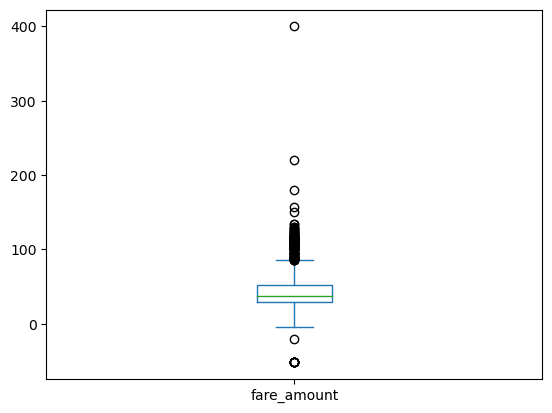

In [26]:
nyc_taxis.fare_amount.plot(kind = "box")

In [27]:
nyc_taxis.fare_amount.max()

400.0

filtering:

In [29]:
nyc_taxis[nyc_taxis.fare_amount > 300]

,pickup_year,pickup_month,pickup_day,pickup_dayofweek,pickup_time,pickup_location_code,dropoff_location_code,trip_distance,trip_length,fare_amount,fees_amount,tolls_amount,tip_amount,total_amount,payment_type
31877,2016,3,11,5,2,2,6,11.8,17015,400.0,0.3,0.0,0.0,400.3,3


get rid of outlier: 

In [30]:
nyc_taxis.drop(31877, axis=0, inplace=True)

inplace False would create a view!!

<Axes: >

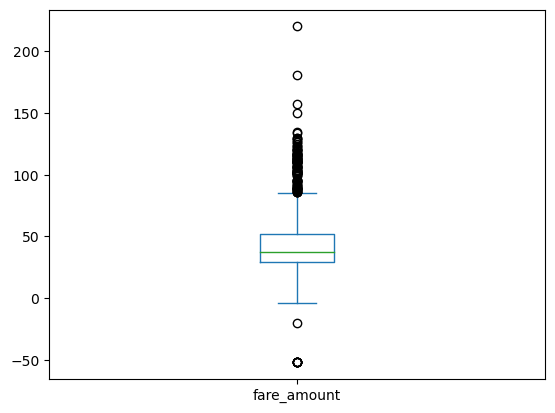

In [31]:
nyc_taxis.fare_amount.plot(kind = "box")

g.snsd.catplot - look it up (i think this is a seaborn thingy)

for categorical data: .value_counts()

plot geographical data: plotting with folium: 

geometry = gpd.points_from_xy(df.lng, df. lat)
obviously replace df with actual name and lng and lat with corresponding column names

geo_df = gdp.geoDataFrame(nameofdf, geometry=geometry)

geo_df.head()

geo_df.plot() = without map in background; 
import map or create folium map

geo_df_list: extract compatible format
look at website!!!

map = folium.Map(location=[enter parameters for city], titles="", zoom_start=9)
    for coordinates in geo_df_list:
    map.add_child(folium.Marker(location=coordinates))